In [1]:
import pymongo
import pprint
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Establish a connection to your MongoDB server
# client = MongoClient('130.238.29.169', 27017)

from pymongo import MongoClient

# MongoDB connection details
host = '130.238.29.169'
port = 27017
username = 'root'
password = 'example'
database = 'mydatabase_test'

# Create the MongoDB URI with authentication
uri = f"mongodb://{username}:{password}@{host}:{port}"

# Establish a connection to your MongoDB server with authentication
client = MongoClient(uri)

# Now you can work with the authenticated connection
# For example, you can access collections in the database
db = client[database]
collection = db['repositories_test']

### What are the top 10 programming languages based on the number of projects developed?

In [6]:
#Group the documents by language and count the projects
pipeline = [
    {'$group': {'_id': '$language', 'count': {'$sum': 1}}},
    {'$sort': {'count': -1}},
    {'$limit': 10}
]

In [7]:
#Perform the aggregation query
result = collection.aggregate(pipeline)
#Retrieve and print the top 10 programming languages
languages = []
counts = []
for doc in result:
    languages.append(doc['_id'])
    counts.append(doc['count'])

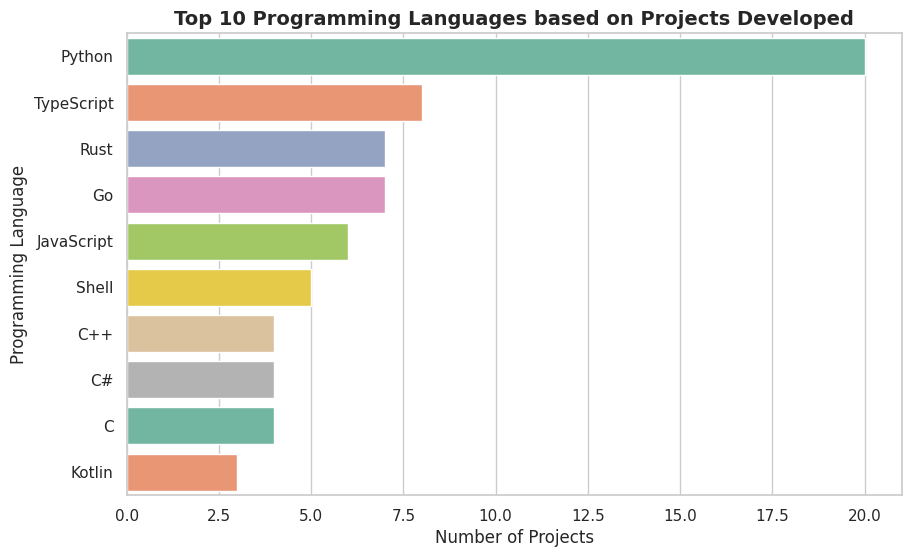

In [8]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(languages))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=languages, palette=color_palette)
plt.xlabel("Number of Projects", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)
plt.title("Top 10 Programming Languages based on Projects Developed", fontsize=14, fontweight='bold')
plt.show()

### What are the top 10 most frequently updated GitHub projects (i.e., most commits in a project)?

In [9]:
# Sort the documents in descending order of commits and retrieve the top 10
top_projects = collection.find().sort('commits', pymongo.DESCENDING).limit(10)
# get the top 10 projects
projects = []
proj_counts = []
for doc in top_projects:
    projects.append(doc['full_name'])
    proj_counts.append(doc['commits'])

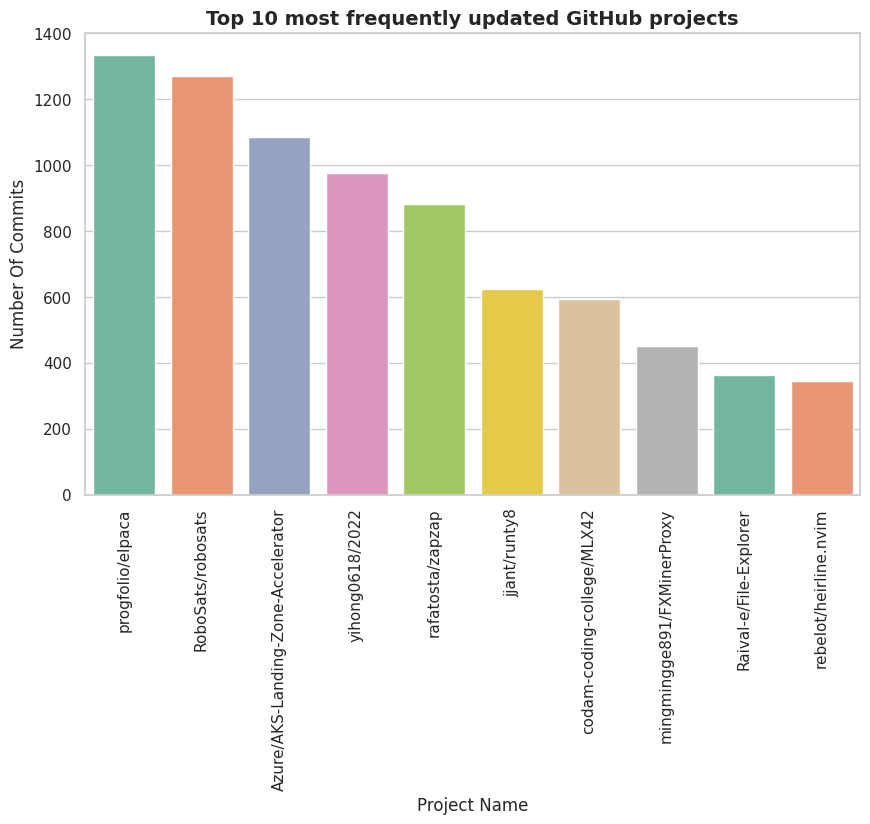

In [10]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(projects))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=projects, y=proj_counts, palette=color_palette)
plt.xlabel("Project Name", fontsize=12)
plt.ylabel("Number Of Commits", fontsize=12)
plt.title("Top 10 most frequently updated GitHub projects", fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

### What are the top 10 programming languages that follow the test-driven development approach (i.e., most projects with unit tests)?

In [11]:
# Query the database to find the top 10 programming languages with the most projects that have unit tests
pipeline = [
    {"$match": {"has_unit_tests": True}},
    {"$group": {"_id": "$language", "count": {"$sum": 1}}},
    {"$sort": {"count": -1}},
    {"$limit": 10}
]
results = collection.aggregate(pipeline)
# Print the top 10 programming languages
td_languages = []
td_count = []
for result in results:
    td_languages.append(result["_id"])
    td_count.append(result["count"])

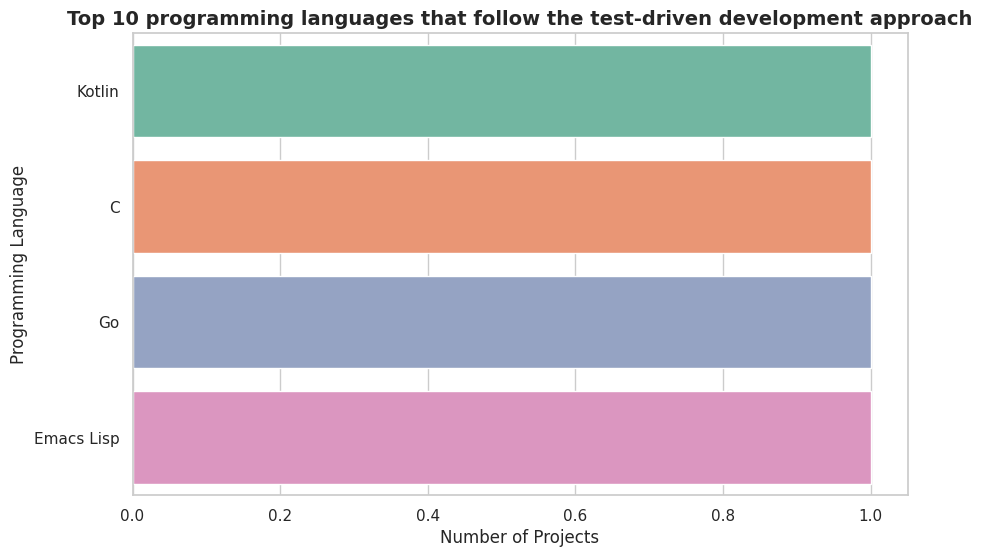

In [12]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(td_languages))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=td_count, y=td_languages, palette=color_palette)
plt.xlabel("Number of Projects", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)
plt.title("Top 10 programming languages that follow the test-driven development approach", fontsize=14, fontweight='bold')
plt.show()

### What are the top 10 programming languages that follow test-driven development and DevOps approach (i.e., uses continuous integration in the development)?

In [19]:
# Query the database
pipeline = [
    {
        '$match': {
            'has_unit_tests': True,
            'has_cicd': True
        }
    },
    {
        '$group': {
            '_id': '$language',
            'count': {'$sum': 1}
        }
    },
    {
        '$sort': {'count': -1}
    },
    {
        '$limit': 10
    }
]
results = collection.aggregate(pipeline)
#top 10 programming languages that follow test-driven development and DevOps approach
de_languages = []
de_count = []
for result in results:
    de_languages.append(result['_id'])
    de_count.append(result['count'])

In [17]:
#Set a customized color palette
color_palette = sns.color_palette("Set2", len(de_languages))
# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=de_count, y=de_languages, palette=color_palette)
plt.xlabel("Number of Projects", fontsize=12)
plt.ylabel("Programming Language", fontsize=12)
plt.title("Top 10 programming languages that follow test-driven development and DevOps approach", fontsize=14, fontweight='bold')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>